In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_start = "../../../enertalk-dataset-00/00/"

In [3]:
ls = os.listdir(path_start)
ls.sort()

In [4]:
print ("Total de dias lidos:",len(ls))
print(ls)

Total de dias lidos: 87
['20161101', '20161102', '20161103', '20161104', '20161105', '20161106', '20161107', '20161109', '20161110', '20161111', '20161112', '20161113', '20161114', '20161115', '20161116', '20161117', '20161118', '20161119', '20161121', '20161122', '20161123', '20161125', '20161126', '20161128', '20161129', '20161130', '20161201', '20161202', '20161203', '20161204', '20161205', '20161206', '20161207', '20161208', '20161209', '20161210', '20161211', '20161212', '20161213', '20161214', '20161215', '20161216', '20161217', '20161218', '20161219', '20161220', '20161221', '20161222', '20161223', '20161224', '20161225', '20161226', '20161227', '20161228', '20161229', '20161230', '20170101', '20170102', '20170103', '20170104', '20170105', '20170106', '20170107', '20170108', '20170109', '20170110', '20170111', '20170112', '20170113', '20170114', '20170115', '20170116', '20170117', '20170118', '20170119', '20170120', '20170121', '20170122', '20170123', '20170124', '20170125', '20

#### Verificando os dias que não contém registro para TV e o refrigerador

In [5]:
data = []
for day in ls:
    if day.startswith("20"):
        path = path_start+day+"/01_TV.parquet.gzip"
        try:
            data.append(pd.read_parquet(path))
        except:
            print(day, 'erro leitura')
            
            # Existem 83 dias de leitura

20161101 erro leitura
20161113 erro leitura
20161117 erro leitura
20161128 erro leitura


In [6]:
data = []
for day in ls:
    if day.startswith("20"):
        path = path_start+day+"/03_fridge.parquet.gzip"
        try:
            data.append(pd.read_parquet(path))
        except:
            print(day, 'erro leitura')
            
            # Existem 39 dias de leitura

20161101 erro leitura
20161102 erro leitura
20161103 erro leitura
20161104 erro leitura
20161105 erro leitura
20161106 erro leitura
20161107 erro leitura
20161109 erro leitura
20161110 erro leitura
20161111 erro leitura
20161112 erro leitura
20161113 erro leitura
20161114 erro leitura
20161115 erro leitura
20161116 erro leitura
20161117 erro leitura
20161118 erro leitura
20161119 erro leitura
20161121 erro leitura
20161122 erro leitura
20161123 erro leitura
20161125 erro leitura
20161126 erro leitura
20161128 erro leitura
20161205 erro leitura
20161206 erro leitura
20161207 erro leitura
20161208 erro leitura
20161209 erro leitura
20161210 erro leitura
20161211 erro leitura
20161212 erro leitura
20161213 erro leitura
20161214 erro leitura
20161215 erro leitura
20161216 erro leitura
20161217 erro leitura
20161218 erro leitura
20161219 erro leitura
20161220 erro leitura
20161221 erro leitura
20161222 erro leitura
20161223 erro leitura
20161224 erro leitura
20161225 erro leitura
20161226 e

### Lendo os datasets
   * Primeiro dia: 
       - TV ->  20161102 - /01_TV.parquet.gzip
       - Refigerador ->  20161129 - /03_fridge.parquet.gzip
   * Último dia:
       - TV ->  20170131 - /01_TV.parquet.gzip
       - Refigerador ->  20170131 - /03_fridge.parquet.gzip

In [7]:
path_tv_01 = "../../../enertalk-dataset-00/00/20161102/01_TV.parquet.gzip"
path_tv_83 = "../../../enertalk-dataset-00/00/20170131/01_TV.parquet.gzip"

path_refr_01 = "../../../enertalk-dataset-00/00/20161129/01_TV.parquet.gzip"
path_refr_39 = "../../../enertalk-dataset-00/00/20170131/01_TV.parquet.gzip"

In [8]:
tv_01 = pd.read_parquet(path_tv_01)
tv_83 = pd.read_parquet(path_tv_83)

refr_01 = pd.read_parquet(path_refr_01)
refr_39 = pd.read_parquet(path_refr_39)

In [9]:
tv_01['timestamp'] = tv_01['timestamp'].apply(lambda x: pd.Timestamp(x, unit='ms'))
tv_83['timestamp'] = tv_83['timestamp'].apply(lambda x: pd.Timestamp(x, unit='ms'))

refr_01['timestamp'] = refr_01['timestamp'].apply(lambda x: pd.Timestamp(x, unit='ms'))
refr_39['timestamp'] = refr_39['timestamp'].apply(lambda x: pd.Timestamp(x, unit='ms'))

In [10]:
tv_01 = tv_01.groupby('timestamp').mean()
tv_83 = tv_83.groupby('timestamp').mean()

refr_01 = refr_01.groupby('timestamp').mean()
refr_39 = refr_39.groupby('timestamp').mean()

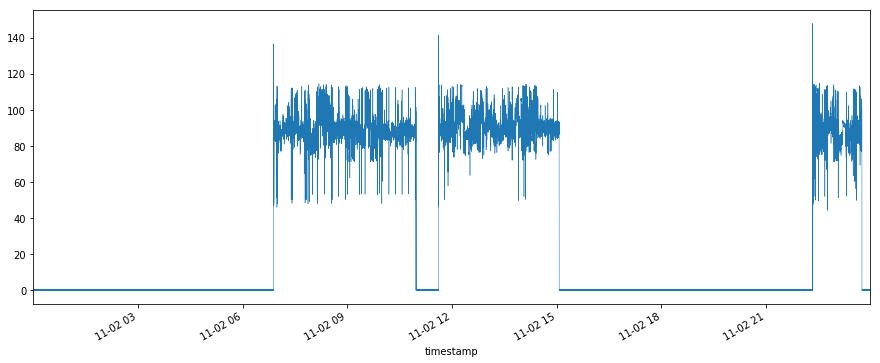

In [11]:
tv_01['active_power'].plot(linewidth=0.5, figsize=(15,6));

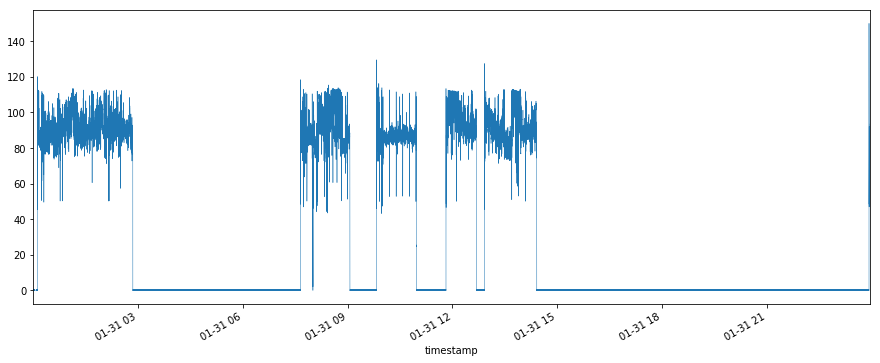

In [12]:
tv_83['active_power'].plot(linewidth=0.5, figsize=(15,6));

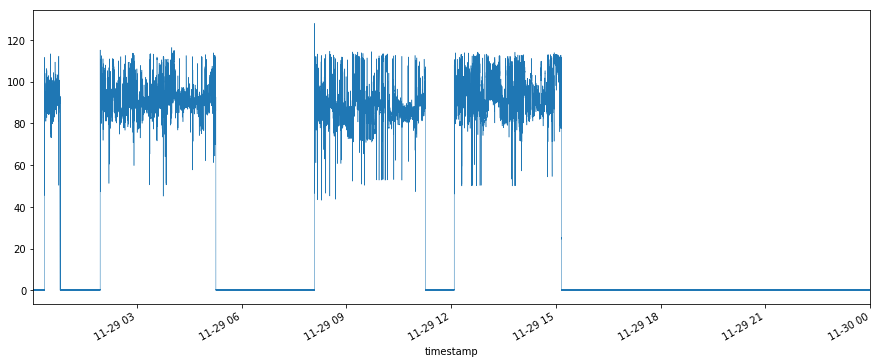

In [13]:
refr_01['active_power'].plot(linewidth=0.5, figsize=(15,6));

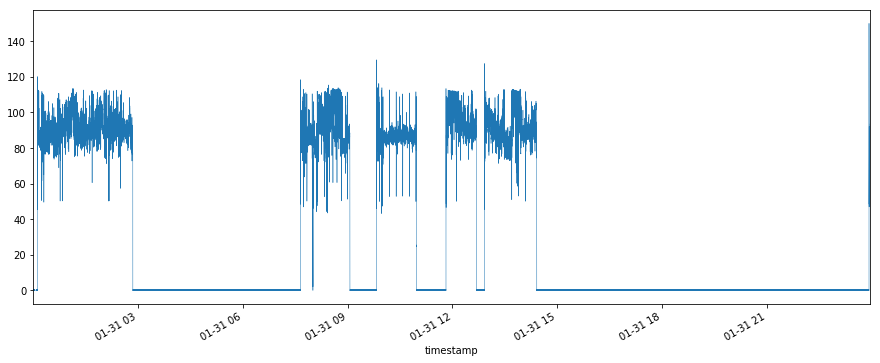

In [14]:
refr_39['active_power'].plot(linewidth=0.5, figsize=(15,6));

### Escrevendo em CSV

In [15]:
tv_01.to_csv( "../../../data/tv_01.csv")
tv_83.to_csv( "../../../data/tv_83.csv")

refr_01.to_csv( "../../../data/refr_01.csv")
refr_39.to_csv( "../../../data/refr_39.csv")

### Brincando com o timestamp

In [16]:
data = pd.read_parquet(path_tv_01)

In [17]:
data['timestamp'] = data['timestamp'].apply(lambda x: pd.Timestamp(x, unit='ms'))

In [18]:
data['timestamp_h'] = data['timestamp'].apply(lambda x: pd.datetime.strftime(x,"%H:%M:%S.%f"))

In [19]:
data['hour'] = data['timestamp'].apply(lambda x: pd.datetime.strftime(x,"%H"))

In [20]:
data['timestamp_d'] = data['timestamp'].apply(lambda x: pd.datetime.strftime(x,"%Y-%m-%d"))

In [21]:
pd.datetime.strftime(data['timestamp'][0],"%a")

'Wed'

In [22]:
data.head()

,active_power,reactive_power,timestamp,timestamp_h,hour,timestamp_d
0,0.28,1.76,2016-11-02 00:00:00.020,00:00:00.020000,00,2016-11-02
1,0.19,1.67,2016-11-02 00:00:00.086,00:00:00.086000,00,2016-11-02
2,0.08,1.62,2016-11-02 00:00:00.153,00:00:00.153000,00,2016-11-02
3,0.14,1.74,2016-11-02 00:00:00.220,00:00:00.220000,00,2016-11-02
4,0.14,1.67,2016-11-02 00:00:00.286,00:00:00.286000,00,2016-11-02


In [23]:
data.tail()

,active_power,reactive_power,timestamp,timestamp_h,hour,timestamp_d
1276150,0.31,1.77,2016-11-02 23:59:16.606,23:59:16.606000,23,2016-11-02
1276151,0.26,1.78,2016-11-02 23:59:16.673,23:59:16.673000,23,2016-11-02
1276152,0.25,1.76,2016-11-02 23:59:16.740,23:59:16.740000,23,2016-11-02
1276153,0.28,1.88,2016-11-02 23:59:16.806,23:59:16.806000,23,2016-11-02
1276154,0.25,1.84,2016-11-02 23:59:16.873,23:59:16.873000,23,2016-11-02


In [24]:
data2 = data.groupby('timestamp').mean()

In [25]:
data = data.set_index('hour')

In [26]:
data.head()

,active_power,reactive_power,timestamp,timestamp_h,timestamp_d
hour,,,,,
00,0.28,1.76,2016-11-02 00:00:00.020,00:00:00.020000,2016-11-02
00,0.19,1.67,2016-11-02 00:00:00.086,00:00:00.086000,2016-11-02
00,0.08,1.62,2016-11-02 00:00:00.153,00:00:00.153000,2016-11-02
00,0.14,1.74,2016-11-02 00:00:00.220,00:00:00.220000,2016-11-02
00,0.14,1.67,2016-11-02 00:00:00.286,00:00:00.286000,2016-11-02


In [27]:
data2.head()

,active_power,reactive_power
timestamp,,
2016-11-02 00:00:00.020,0.28,1.76
2016-11-02 00:00:00.086,0.19,1.67
2016-11-02 00:00:00.153,0.08,1.62
2016-11-02 00:00:00.220,0.14,1.74
2016-11-02 00:00:00.286,0.14,1.67


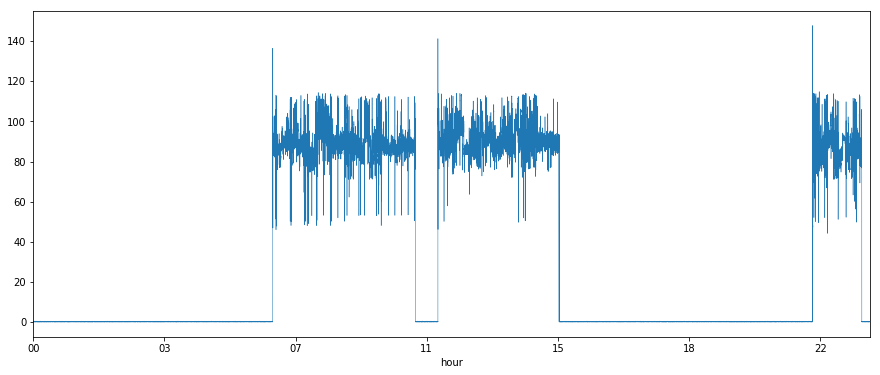

In [28]:
data['active_power'].plot(linewidth=0.5, figsize=(15,6));

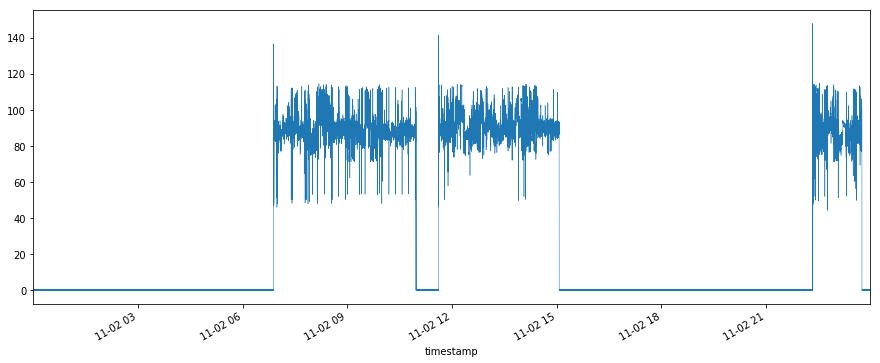

In [29]:
data2['active_power'].plot(linewidth=0.5, figsize=(15,6));

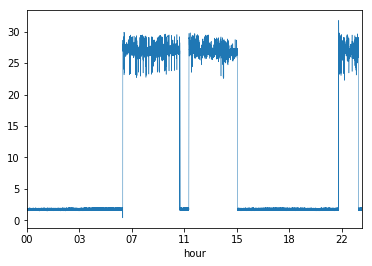

In [30]:
data['reactive_power'].plot(linewidth=0.5);

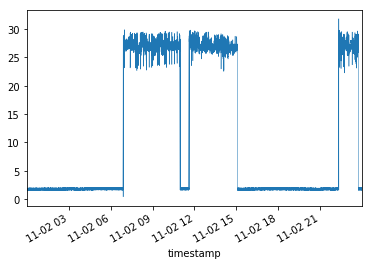

In [31]:
data2['reactive_power'].plot(linewidth=0.5);